In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples

num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples

num_test_samples = tf.cast(num_test_samples, tf.int64)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.I4WIJL_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.I4WIJL_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

In [4]:
BUFFER_SIZE = 1000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


In [5]:
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [7]:
input_size = 784
output_size = 10

hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
NUM_EPOCHS = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose = 1
          )

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7831 - loss: 0.7297 - val_accuracy: 0.9327 - val_loss: 0.2206
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9445 - loss: 0.1966 - val_accuracy: 0.9480 - val_loss: 0.1662
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9571 - loss: 0.1477 - val_accuracy: 0.9562 - val_loss: 0.1480
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9661 - loss: 0.1161 - val_accuracy: 0.9622 - val_loss: 0.1271
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9703 - loss: 0.1013 - val_accuracy: 0.9618 - val_loss: 0.1250
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9742 - loss: 0.0879 - val_accuracy: 0.9658 - val_loss: 0.1154
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9769 - loss: 0.0765 - val_accuracy: 0.9665 - val_loss: 0.1107
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9806 - loss: 0.0678 - val_accuracy

In [9]:
test_loss,test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step - accuracy: 0.9688 - loss: 0.1089
Test loss: 0.11. Test accuracy: 96.88%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Model przewiduje: 2, Etykieta rzeczywista: 2


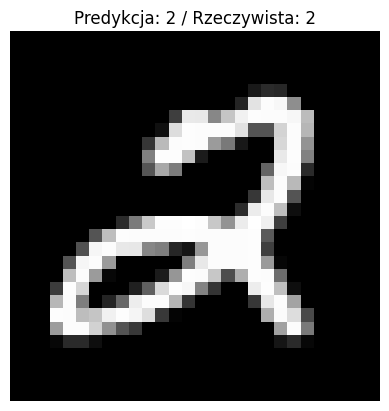

In [11]:
for image, label in test_data.unbatch().take(1):  # tylko 1 próbka
    sample_image = image.numpy()
    sample_label = label.numpy()


sample_input = np.expand_dims(sample_image, axis=0)


prediction = model.predict(sample_input)
predicted_label = np.argmax(prediction)


print(f"Model przewiduje: {predicted_label}, Etykieta rzeczywista: {sample_label}")
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Predykcja: {predicted_label} / Rzeczywista: {sample_label}")
plt.axis('off')
plt.show()